## STEPS
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

# Import libraries



In [8]:
import numpy as np                               
from PIL import Image                                                
import matplotlib.pyplot as plt                  
from skimage import data
from skimage.color import rgb2gray
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__


'2.5.0'

In [9]:
from google.colab.patches import cv2_imshow
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow      # To show images using cv2 module

In [10]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')
images= np.load('/content/drive/MyDrive/images.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
## visualise image in dataset
images

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

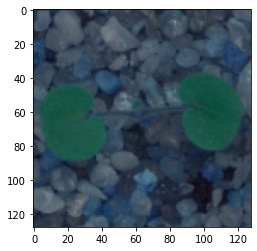

In [12]:
#Exemple of vizualisation, picture on the 1st row
plt.imshow(images[0])


In [13]:
# Read the labels
labels= pd.read_csv('/content/drive/MyDrive/Labels.csv')

In [14]:
# Vizualise the labels
labels


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [15]:
# Summarize the labels
labels2= labels.groupby(['Label']).count()
labels2

""
Label
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed


We can count 12 different labels

In [16]:
#Print shape of data
labels.shape

(4750, 1)

labels appear as vectors


In [17]:
images.shape

(4750, 128, 128, 3)

Data consists of: 
- 12 labels (plant species)
- 4750 pictures made of multidimentional array of 128 (width) x128 (height) pixels and using 3 colours RGB.

## 2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.

In [18]:
# Normalization. 

### Normalize data
We divide the RGB codes with 255
We make sure that the values are float so that we can get decimal points after division

In [19]:
images.astype('float32')
images2=images / 255

In [20]:
images2

array([[[[0.1372549 , 0.20392157, 0.30588235],
         [0.14117647, 0.19215686, 0.29803922],
         [0.12156863, 0.17647059, 0.27058824],
         ...,
         [0.30588235, 0.37254902, 0.44705882],
         [0.29803922, 0.36470588, 0.43137255],
         [0.31372549, 0.37254902, 0.42745098]],

        [[0.12941176, 0.18039216, 0.26666667],
         [0.14509804, 0.19607843, 0.28627451],
         [0.18823529, 0.25490196, 0.3254902 ],
         ...,
         [0.31764706, 0.37647059, 0.44313725],
         [0.29019608, 0.34901961, 0.41176471],
         [0.3254902 , 0.37254902, 0.42745098]],

        [[0.13333333, 0.19607843, 0.26666667],
         [0.1372549 , 0.20392157, 0.28235294],
         [0.2745098 , 0.33333333, 0.39607843],
         ...,
         [0.3254902 , 0.38039216, 0.43921569],
         [0.30980392, 0.36862745, 0.42352941],
         [0.30980392, 0.36862745, 0.41960784]],

        ...,

        [[0.1372549 , 0.19607843, 0.27058824],
         [0.16470588, 0.22352941, 0.28627451]

In [21]:
# Gaussian blurring

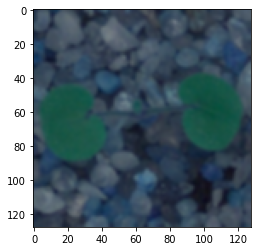

In [22]:
#Exemples of using gaussian on normalized picture 0 row
images2_gaussian = cv2.GaussianBlur(images2[0], (3, 3), 0)
plt.imshow(images2_gaussian)

In [23]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
new_x=np.empty((4750, 128, 128,3)) 
new_x.shape

(4750, 128, 128, 3)

In [24]:
# Setting up a loop to apply to all images
for i in range (0,4749): 
    new_x[i] = cv2.GaussianBlur(images2[i], (3, 3), 0)
  


In [25]:
#Visualise data after pre-processing

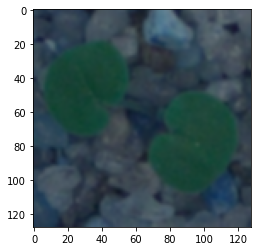

In [26]:
#Exemple of picture after pre-processing: image number 10
plt.imshow(new_x[9])

it looks blurred!

In [27]:
#Display of the nummpy array after pre-processing
new_x.shape

(4750, 128, 128, 3)

# 3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

## Convert Label to one-hot vector

In [28]:
# We use one hot encoding using get dummies
df_dummies= pd.get_dummies(labels, columns=['Label'])

newlabels=df_dummies
newlabels



,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
newlabels.dtypes

Label_Black-grass                  uint8
Label_Charlock                     uint8
Label_Cleavers                     uint8
Label_Common Chickweed             uint8
Label_Common wheat                 uint8
Label_Fat Hen                      uint8
Label_Loose Silky-bent             uint8
Label_Maize                        uint8
Label_Scentless Mayweed            uint8
Label_Shepherds Purse              uint8
Label_Small-flowered Cranesbill    uint8
Label_Sugar beet                   uint8
dtype: object

In [30]:

#Lets rename the column
newlabels.columns = ["Black-grass",  "Charlock","Cleavers","Common Chickweed", 
                              "Common wheat", "Fat Hen", "Loose Silky-bent", 
                              "Maize", "Scentless Mayweed", 
                              "Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"]

newlabels

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
newlabels.shape

(4750, 12)

## b. Print the label for y_train[0].

In [32]:
# We see from the dataframe that y_train[0] is the Small Flowered CranesBill (only one with unit 1)

## c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

In [33]:
#Split Data train and test
x = new_x
y = newlabels
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3 , random_state=1, stratify=y)

In [34]:
# Split data train and validate
xtrain, xval, ytrain, yval= train_test_split (xtrain, ytrain, test_size=0.5 , random_state=1) #0.5 x 0.7= 0.35

## d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [35]:
# Checking the shape of data
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("xval shape:", xval.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)
print("yval shape:", yval.shape)
print("Images in xtrain:", xtrain.shape[0])
print("Images in xtest:", xtest.shape[0])
print("Images in xval:", xval.shape[0])
print("Max value in xtrain:", xtrain.max())
print("Min value in xtrain:", xtrain.min())
print("Max value in xtest:", xtest.max())
print("Min value in xtest:", xtest.min())
print("Max value in xval:", xval.max())
print("Min value in xval:", xval.min())


xtrain shape: (1662, 128, 128, 3)
xtest shape: (1425, 128, 128, 3)
xval shape: (1663, 128, 128, 3)
ytrain shape: (1662, 12)
ytest shape: (1425, 12)
yval shape: (1663, 12)
Images in xtrain: 1662
Images in xtest: 1425
Images in xval: 1663
Max value in xtrain: 1.0
Min value in xtrain: 0.0
Max value in xtest: 1.0
Min value in xtest: 0.0
Max value in xval: 1.0
Min value in xval: 0.0


In [36]:
new_x

array([[[[0.13823529, 0.19313725, 0.28921569],
         [0.14362745, 0.19901961, 0.29215686],
         [0.17058824, 0.22892157, 0.31078431],
         ...,
         [0.30588235, 0.36862745, 0.43676471],
         [0.30490196, 0.36519608, 0.42892157],
         [0.30686275, 0.36470588, 0.4245098 ]],

        [[0.1372549 , 0.19362745, 0.28235294],
         [0.15245098, 0.20980392, 0.29558824],
         [0.19779412, 0.25808824, 0.33333333],
         ...,
         [0.30955882, 0.36960784, 0.43431373],
         [0.30735294, 0.36593137, 0.42696078],
         [0.30784314, 0.36470588, 0.42254902]],

        [[0.13529412, 0.19901961, 0.27794118],
         [0.16372549, 0.22769608, 0.30392157],
         [0.23284314, 0.29656863, 0.36446078],
         ...,
         [0.3127451 , 0.36862745, 0.42745098],
         [0.3122549 , 0.36911765, 0.42401961],
         [0.31176471, 0.36911765, 0.42107843]],

        ...,

        [[0.15098039, 0.20931373, 0.27941176],
         [0.15710784, 0.21544118, 0.28259804]

#4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [37]:
#import relevant programs


In [38]:

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

In [39]:
# Define layers


# Description of the various layers and the explanation

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Max Pool layer with size 2×2.
- Dropout layer at 20%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 40%.
- Max Pool layer with size 2×2.

- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 40%.
- Max Pool layer with size 2×2.

- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 50%.
- Max Pool layer with size 2×2.

--
- GlobalMaxPooling2D layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 12 units and a softmax activation function. # We choose 12 as there are 12 classes


In [40]:
# CNN model



model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=xtrain.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax")) # 12 as there are 12 classes

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0

## b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [41]:
# Initiate Adam gradient descent optimizer with categorical_crossentropy loss function

In [42]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [43]:
# We compile
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [44]:
#Given the bif size of the dataset, we add add Early stopping callback and model checkpoint to save time.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10) # We set a small delta and a small patience level to avoid too much calculation

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

# 5. Fit and evaluate model and print confusion matrix. (10 Marks)

Epoch 1/400
831/831 [==============================] - 36s 8ms/step - loss: 3.1351 - accuracy: 0.1516 - val_loss: 2.8438 - val_accuracy: 0.1375

Epoch 00001: val_loss improved from inf to 2.84376, saving model to cifar_cnn_checkpoint_01_loss2.8438.h5
Epoch 2/400
831/831 [==============================] - 7s 8ms/step - loss: 2.2400 - accuracy: 0.2202 - val_loss: 2.1746 - val_accuracy: 0.2309

Epoch 00002: val_loss improved from 2.84376 to 2.17464, saving model to cifar_cnn_checkpoint_02_loss2.1746.h5
Epoch 3/400
831/831 [==============================] - 7s 8ms/step - loss: 2.2181 - accuracy: 0.2226 - val_loss: 4.7191 - val_accuracy: 0.1375

Epoch 00003: val_loss did not improve from 2.17464
Epoch 4/400
831/831 [==============================] - 6s 7ms/step - loss: 2.1747 - accuracy: 0.2226 - val_loss: 4.9505 - val_accuracy: 0.1375

Epoch 00004: val_loss did not improve from 2.17464
Epoch 5/400
831/831 [==============================] - 7s 8ms/step - loss: 2.2004 - accuracy: 0.2292 - va

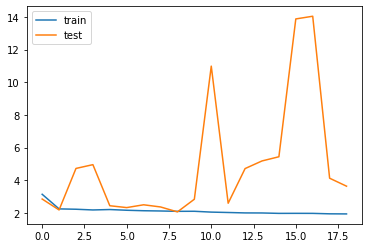

In [45]:

epochs= 400 # Given the big size of the dataset, we are going to chose large number of epochs and small batch size.
batch_size= 2 # Given the big size of the dataset, we are going to chose large number of epochs and small batch size.
history = model.fit(xtrain,
                    ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(xtest, ytest),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint]) 


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [47]:
# Evaluate the model
# Score trained model.
scores = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 12ms/step - loss: 3.6311 - accuracy: 0.3193
Test loss: 3.6311190128326416
Test accuracy: 0.31929823756217957


Comments on the results:
We are getting 32% accuracy, which is still low. We improved it from even lower figures by reducing the batch size and increasing the number of epochs.

In [79]:
# build confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(xtest).reshape(-1, 128, 128, 3) # Defining y_pred. We are trying to reshape because matrix cannot handle multi sources with different dimensions
print("=== Classification Report ===")
print(classification_report(ytest, y_pred))
print("=== Confusion Matrix ===")
cm = confusion_matrix(ytest, y_pred)
print(cm)

ValueError: ignored

# 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Predicted label: 6
Softmax Outputs: [[4.3216956e-01 3.5556241e-07 1.1179790e-05 5.4497758e-07 6.3023962e-02
  2.8490811e-03 4.9844885e-01 3.0385802e-06 3.4114858e-03 9.9975757e-08
  1.2367771e-07 8.1757171e-05]]
1.0


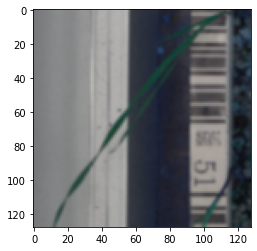

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[2])
y_pred = model.predict(xtest[2].reshape(-1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Prediction for xtest[2] is label 6

Predicted label: 5
Softmax Outputs: [[0.10710319 0.00903408 0.04354443 0.00769813 0.13336702 0.22630955
  0.20926496 0.005869   0.1430083  0.00341685 0.00502466 0.10635985]]
1.0


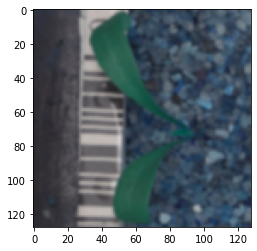

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[3])
y_pred = model.predict(xtest[3].reshape(-1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

prediction for xtest[3] is label 5

Predicted label: 6
Softmax Outputs: [[2.8219321e-01 1.9692486e-08 7.7453387e-06 5.4354341e-08 6.8994083e-02
  1.7001148e-02 6.2811220e-01 1.1399289e-06 3.5931240e-03 1.0826195e-08
  3.0872782e-09 9.7337921e-05]]
1.0000001


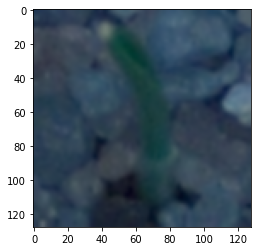

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[33])
y_pred = model.predict(xtest[33].reshape(-1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Prediction for xtest[33] is label 6

Predicted label: 6
Softmax Outputs: [[3.9983031e-01 8.7610843e-08 6.0761372e-06 8.6410061e-08 7.2491132e-02
  2.8519814e-03 5.2244914e-01 9.8991097e-07 2.3309104e-03 2.5267900e-08
  1.9026885e-08 3.9175779e-05]]
0.99999994


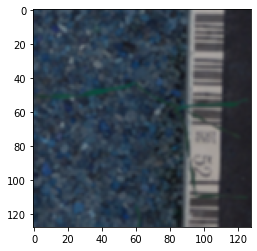

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[59])
y_pred = model.predict(xtest[59].reshape(-1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Prediction for xtest[59] is label 6

Predicted label: 6
Softmax Outputs: [[2.5479686e-01 1.5231723e-05 2.0882751e-04 4.2285090e-05 7.1077503e-02
  3.4180932e-02 6.1538768e-01 2.7008352e-04 2.3058316e-02 1.1194736e-05
  1.1660193e-05 9.3934609e-04]]
0.9999999


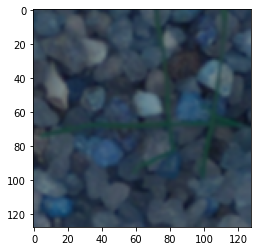

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[36])
y_pred = model.predict(xtest[36].reshape(-1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Prediction for xtest[36] is label 6

Conclusion: We see that many of the predictions are wrong, in line with the accuracy score received!